# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [13]:
# Bivariada para 'sex'
bivariada = df.groupby('sex')['flag_doente'].agg(
    saudaveis=lambda x: (x == 0).sum(),
    doentes=lambda x: (x == 1).sum(),
    total='count'
).reset_index()

# Calcular Quantidade Média de Doentes
bivariada['qtd_media_doentes'] = bivariada['doentes'] / bivariada['total']

# Calcular Odds
bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

# Odds Ratio (referência = Total)
odds_total = df['flag_doente'].sum() / (len(df) - df['flag_doente'].sum())
bivariada['odds_ratio'] = bivariada['odds'] / odds_total

# Logito (LOG(Odds))
bivariada['logito'] = np.log(bivariada['odds'])

# Weight of Evidence (WOE)
bivariada['woe'] = np.log(bivariada['odds_ratio'])

# Mostrar a tabela final
print(bivariada)

   sex  saudaveis  doentes  total  qtd_media_doentes      odds  odds_ratio  \
0  0.0         72       25     97           0.257732  0.347222    0.409672   
1  1.0         92      114    206           0.553398  1.239130    1.461996   

    logito       woe  
0 -1.05779 -0.892398  
1  0.21441  0.379802  


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [17]:
# Categorizar a variável age em 5 grupos
df['age_group'] = pd.qcut(df['age'], q=5, labels=[f'G{i}' for i in range(1, 6)])

# Bivariada para 'age_group'
bivariada_age = df.groupby('age_group', observed=False)['flag_doente'].agg(
    saudaveis=lambda x: (x == 0).sum(),
    doentes=lambda x: (x == 1).sum(),
    total='count'
).reset_index()

# Calcular Quantidade Média de Doentes
bivariada_age['qtd_media_doentes'] = bivariada_age['doentes'] / bivariada_age['total']

# Calcular Odds
bivariada_age['odds'] = bivariada_age['doentes'] / bivariada_age['saudaveis']

# Odds Ratio (referência = Total)
odds_total_age = df['flag_doente'].sum() / (len(df) - df['flag_doente'].sum())
bivariada_age['odds_ratio'] = bivariada_age['odds'] / odds_total_age

# Logito (LOG(Odds))
bivariada_age['logito'] = np.log(bivariada_age['odds'])

# Weight of Evidence (WOE)
bivariada_age['woe'] = np.log(bivariada_age['odds_ratio'])

# Valor médio da variável age por grupo
bivariada_age['idade_media'] = df.groupby('age_group', observed=False)['age'].mean().values

# Mostrar a tabela final
print(bivariada_age)

  age_group  saudaveis  doentes  total  qtd_media_doentes      odds  \
0        G1         47       16     63           0.253968  0.340426   
1        G2         42       22     64           0.343750  0.523810   
2        G3         32       39     71           0.549296  1.218750   
3        G4         13       32     45           0.711111  2.461538   
4        G5         30       30     60           0.500000  1.000000   

   odds_ratio    logito       woe  idade_media  
0    0.401653 -1.077559 -0.912166    41.222222  
1    0.618020 -0.646627 -0.481235    50.000000  
2    1.437950  0.197826  0.363218    56.211268  
3    2.904261  0.900787  1.066179    60.355556  
4    1.179856  0.000000  0.165392    66.516667  


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

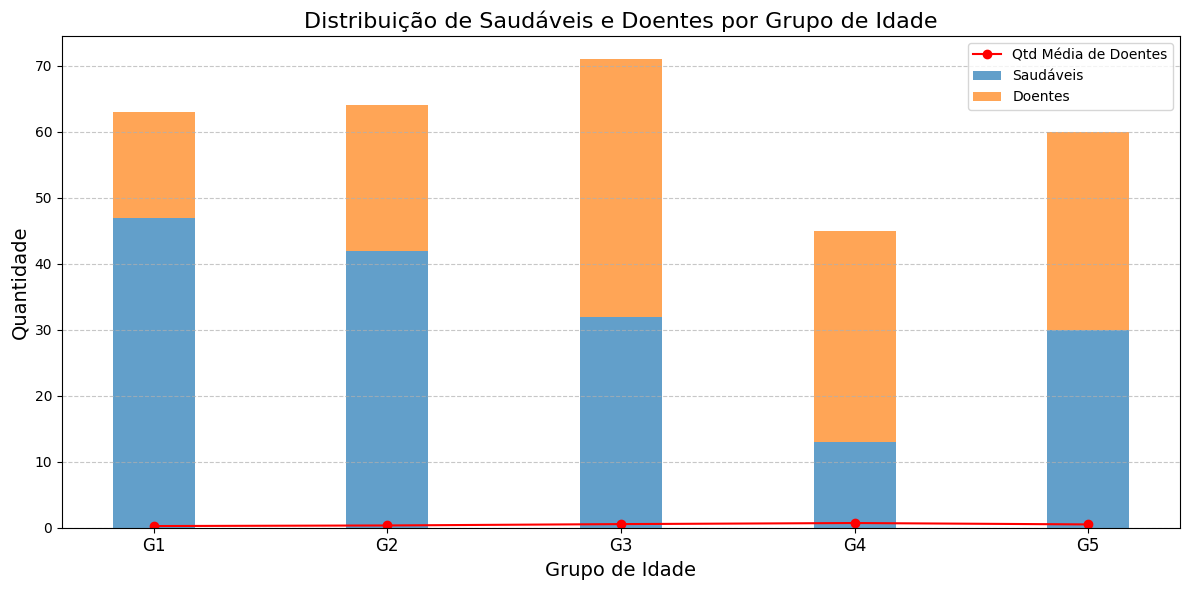

In [19]:
# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Gráfico de barras para visualizar os saudáveis e doentes
x = bivariada_age['age_group']
bar_width = 0.35

# Saudáveis e Doentes
plt.bar(x, bivariada_age['saudaveis'], width=bar_width, label='Saudáveis', alpha=0.7)
plt.bar(x, bivariada_age['doentes'], width=bar_width, bottom=bivariada_age['saudaveis'], label='Doentes', alpha=0.7)

# Adicionar quantidade média de doentes como linha
plt.plot(x, bivariada_age['qtd_media_doentes'], color='red', marker='o', label='Qtd Média de Doentes')

# Configurações do gráfico
plt.title('Distribuição de Saudáveis e Doentes por Grupo de Idade', fontsize=16)
plt.xlabel('Grupo de Idade', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()